In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

import shap
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
%matplotlib inline 

In [3]:
data = pd.read_csv('../users_more_than_ten.csv')

In [85]:
y = data['target'].values
X = data.iloc[:,:-1].values
X_train, X_test, y_train, y_test = train_test_split(X,y)


gbc = GradientBoostingClassifier(learning_rate =.01, n_estimators= 2500,
                    max_features= 'auto',
                     max_depth= 2,
                     )
gbc.fit(X_train, y_train)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=2,
                           max_features='auto', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=2500,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [86]:
y_hat = gbc.predict(X_test)

In [87]:
y_train_hat = gbc.predict(X_train)

In [9]:
def standard_confusion_matrix(y_true, y_predict):
    y_true = np.array(y_true)
    y_predict = np.array(y_predict)

    tp = np.sum((y_true == y_predict) & (y_predict==1))
    fp = np.sum((y_true != y_predict) & (y_predict==1))
    fn = np.sum((y_true != y_predict) & (y_predict==0))
    tn = np.sum((y_true == y_predict) & (y_predict==0))
   
    return np.array([[tp, fp], [fn, tn]])

In [88]:
standard_confusion_matrix(y_test, y_hat)

array([[ 160,   75],
       [ 289, 1241]])

In [89]:
precision_score(y_test, y_hat)

0.6808510638297872

In [90]:
gbc.score(X_test, y_test)

0.7937677053824362

In [91]:
recall_score(y_test, y_hat)

0.35634743875278396

In [82]:
standard_confusion_matrix(y_train, y_train_hat)

array([[ 910,   17],
       [ 296, 4072]])

In [92]:
recall_score(y_train, y_train_hat)

0.42109777015437394

In [93]:
precision_score(y_train, y_train_hat)

0.7473363774733638

In [103]:
#plt.scatter(rfc.predict_proba(X_test)[0][0], rfc.predict_proba(X_test)[0][1])

In [105]:
(rfc.predict_proba(X_test)).astype(list)

array([[0.9805003823003833, 0.019499617699616542],
       [0.9990352038278106, 0.0009647961721894658],
       [0.999971288056188, 2.8711943812026413e-05],
       ...,
       [0.9999489404978209, 5.1059502179262455e-05],
       [0.6543401064299852, 0.34565989357001503],
       [0.9647675284363595, 0.03523247156364067]], dtype=object)

In [27]:
def roc_curve_(probabilities, labels):
    '''
    INPUT: numpy array, numpy array
    OUTPUT: list, list, list

    Take a numpy array of the predicted probabilities and a numpy array of the
    true labels.
    Return the True Positive Rates, False Positive Rates and Thresholds for the
    ROC curve.
    '''
    sorted = np.sort(probabilities)
    threshold = list(sorted)
    true_pos = labels.sum()
    true_neg =  len(labels)-true_pos
    
    TPR =[]
    FPR = []
    for vals in threshold:        
        pos = np.sum((vals <= probabilities) & (labels==True))
        f_pos = np.sum((vals <= probabilities) & (labels==False))

        TPR.append(pos/true_pos)
        FPR.append(f_pos/true_neg)
    return TPR, FPR, threshold

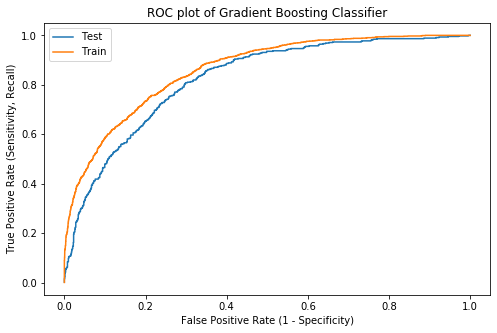

In [94]:
probabilities = gbc.predict_proba(X_test)[:, 1]
probabilities2 = gbc.predict_proba(X_train)[:, 1]
tpr, fpr, thresholds = roc_curve_(probabilities, y_test)
tpr2, fpr2, thresholds2 = roc_curve_(probabilities2, y_train)

fig, ax = plt.subplots(figsize=(8,5))
ax.plot(fpr, tpr, label='Test')
ax.plot(fpr2, tpr2, label='Train')
ax.set_xlabel("False Positive Rate (1 - Specificity)")
ax.set_ylabel("True Positive Rate (Sensitivity, Recall)")
ax.set_title("ROC plot of Gradient Boosting Classifier")
ax.legend()
plt.show()

In [ ]:
#Looking at Feature Importances 

In [52]:
data.columns

Index(['user_id', 'topic_mode', 'suggested', 'review_mode', 'time_taken',
       'correct', 'count_attempts', 'hint_used', 'count_hints',
       'earned_proficiency', 'points_earned', 'more_than_ten_activities',
       'more_than_100_activities', 'more_than_1000_activities',
       'active_from_last', 'one_before', 'two_before', 'three_before',
       'four_before', 'five_before', 'six_before', 'seven_before', 'target'],
      dtype='object')

In [44]:
col_list = ['user_id', 'topic_mode', 'suggested', 'review_mode', 'time_taken',
       'correct', 'count_attempts', 'hint_used', 'count_hints',
       'earned_proficiency', 'points_earned', 'more_than_ten_activities',
       'more_than_100_activities', 'more_than_1000_activities',
       'active_from_last', 'one_before', 'two_before', 'three_before',
       'four_before', 'five_before', 'six_before', 'seven_before']

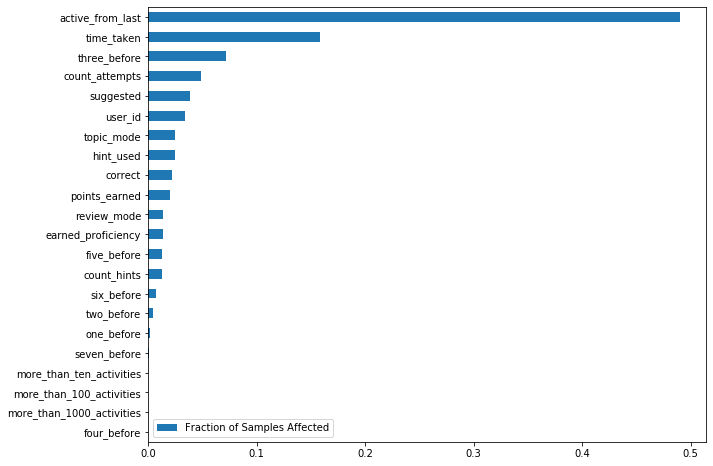

In [95]:
feat_scores = pd.DataFrame({'Fraction of Samples Affected' : gbc.feature_importances_},
                           index=col_list)
feat_scores = feat_scores.sort_values(by='Fraction of Samples Affected')
feat_scores.plot(kind='barh', figsize=(10,8))

In [97]:
gb = GradientBoostingClassifier()

gb_random = GridSearchCV(estimator = gb, cv= 5, param_grid = random_grid,  n_jobs = -1)
# Fit the random search model


In [98]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 500, stop = 5000, num =10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2,8,6)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'n_estimators': [500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 3, 4, 5, 6, 8, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}


In [ ]:
gb_random.fit(X_train, y_train)

In [95]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': None,
 'bootstrap': True}

In [47]:
shap.initjs()

In [48]:
explainer = shap.TreeExplainer(gbc)
shap_values = explainer.shap_values(X_train)

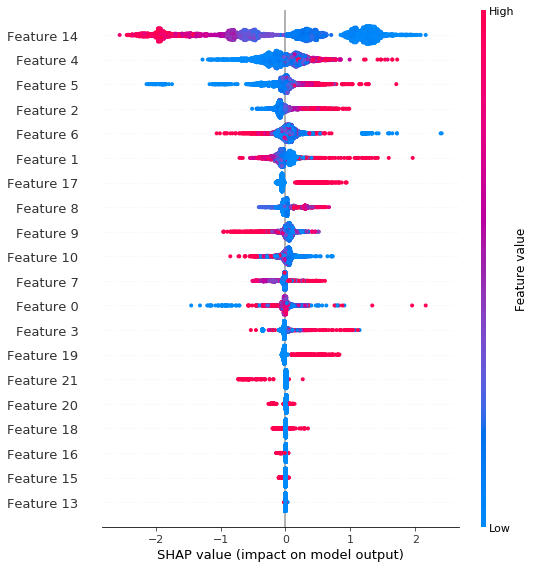

In [50]:
shap.summary_plot(shap_values, X_train)

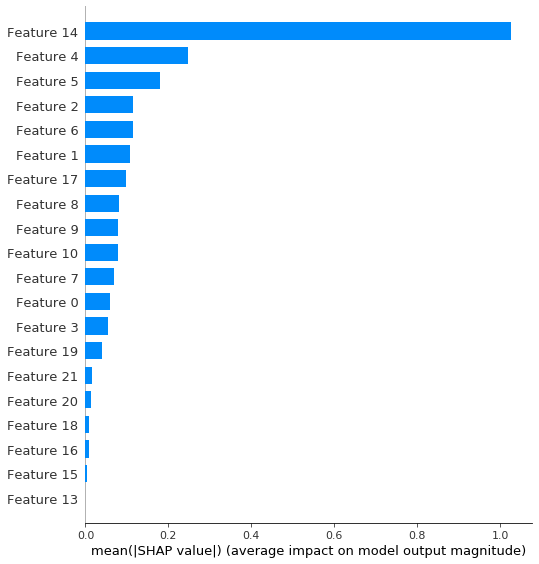

In [51]:
shap.summary_plot(shap_values, X, plot_type="bar")
